In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_white_balance(image):
    # Convert image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split into L, A, and B channels
    l, a, b = cv2.split(lab)

    # Find the average A and B values in the brightest areas
    l_mean = np.mean(l)
    mask = l > l_mean  # Mask of bright areas
    avg_a = np.mean(a[mask])
    avg_b = np.mean(b[mask])

    # Adjust A and B channels so that the average becomes neutral
    a_adjusted = a - ((avg_a - 128) * (l / 255.0) * 1.1)
    b_adjusted = b - ((avg_b - 128) * (l / 255.0) * 1.1)

    # Convert adjusted channels back to uint8
    a_adjusted = np.clip(a_adjusted, 0, 255).astype(np.uint8)
    b_adjusted = np.clip(b_adjusted, 0, 255).astype(np.uint8)

    # Merge adjusted A and B channels back
    lab_adjusted = cv2.merge([l, a_adjusted, b_adjusted])
    balanced_image = cv2.cvtColor(lab_adjusted, cv2.COLOR_LAB2BGR)

    return balanced_image


def apply_auto_white_balance(image):
    # Create a simple white balance object
    wb = cv2.xphoto.createSimpleWB()
    
    # Apply automatic white balance
    balanced_image = wb.balanceWhite(image)
    
    return balanced_image


def visualize_images(image_path):
    # Load image
    image = cv2.imread(image_path)
    
    # Apply white balance based on toilet white
    balanced_image = apply_white_balance(image)
    
    # Apply automatic white balance
    auto_balanced_image = apply_auto_white_balance(image)
    
    # Visualization
    plt.figure(figsize=(18, 6))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    
    # White balanced image (based on toilet white)
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB))
    plt.title("White Balanced Image (Based on Toilet White)")
    plt.axis('off')
    
    # Auto white balanced image
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(auto_balanced_image, cv2.COLOR_BGR2RGB))
    plt.title("Auto White Balanced Image")
    plt.axis('off')
    
    plt.show()

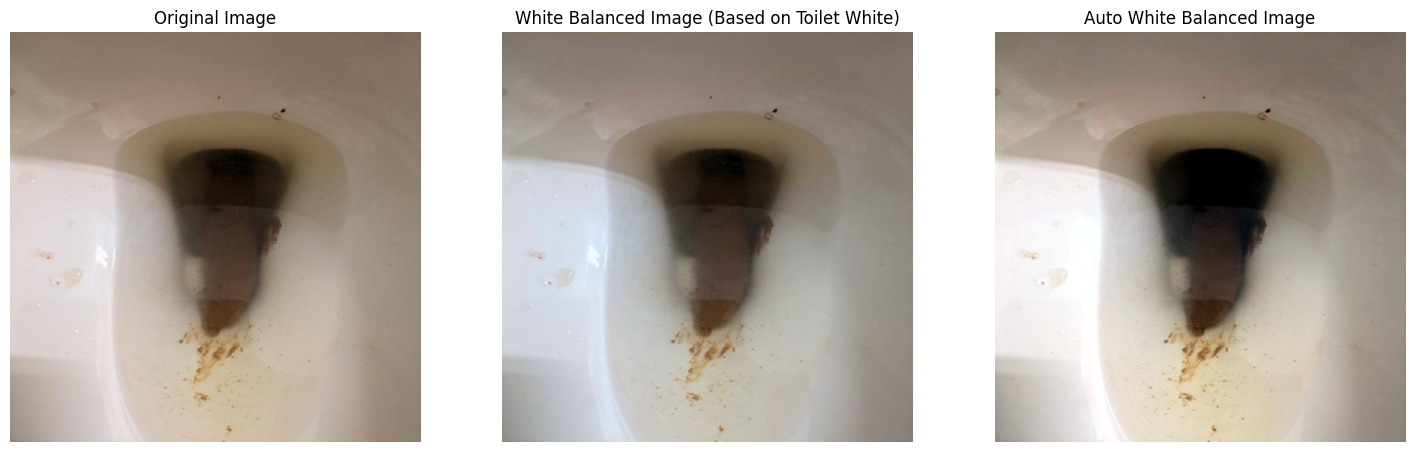

In [8]:
# 이미지 로드
image_path = '/root/ai/dataset/bristol_type_300-599/339_jpeg.rf.292762c679e9f35cf751a44bef6d96c2.jpg'
visualize_images(image_path)

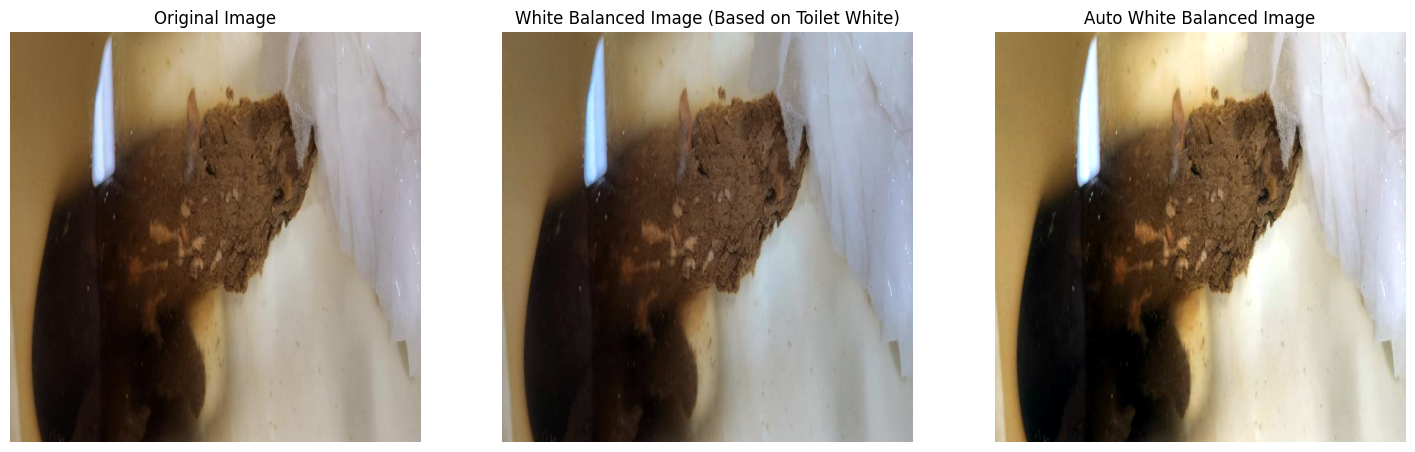

In [9]:
image_path = "/root/ai/dataset/bristol_type_300-599/344_jpeg.rf.f9e44df8ab2e88ae0af093439a2d7140.jpg"
visualize_images(image_path)

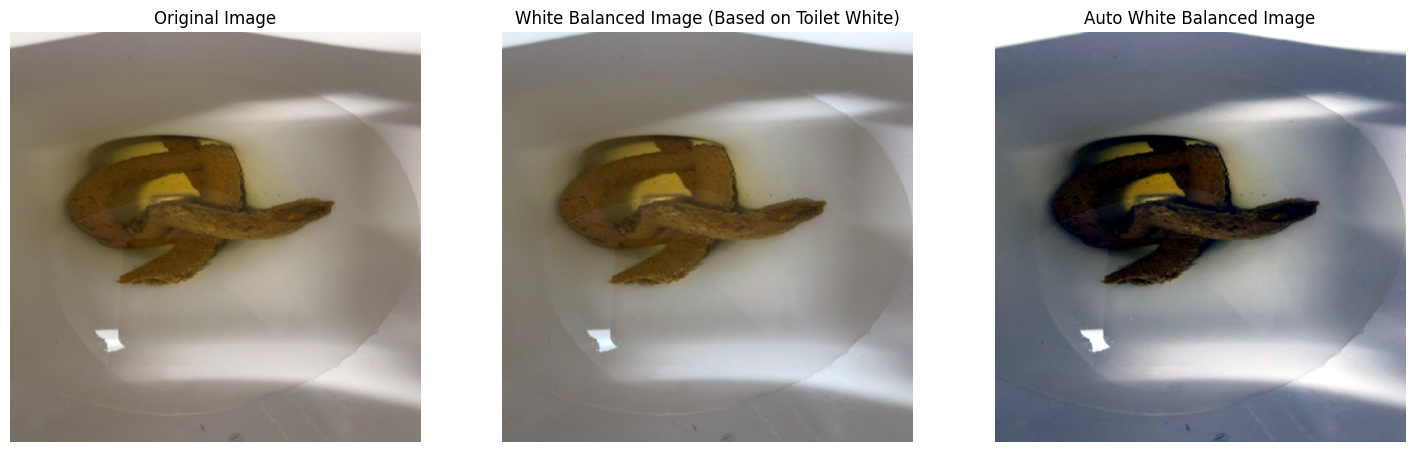

In [10]:
image_path = "/root/ai/dataset/bristol_type_300-599/594_jpeg.rf.f212bf2cf39f071b36cea2ec11fbd769.jpg"
visualize_images(image_path)

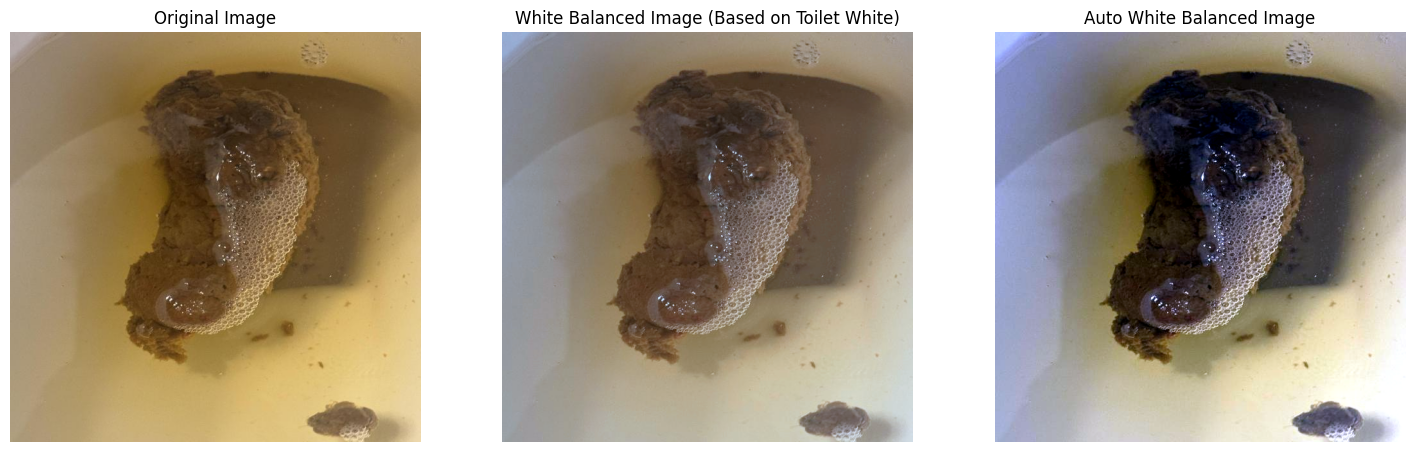

In [11]:
image_path = "/root/ai/dataset/bristol_type_300-599/578_jpeg.rf.3277cf14cfed8481bddfbbe3abccf9b3.jpg"
visualize_images(image_path)

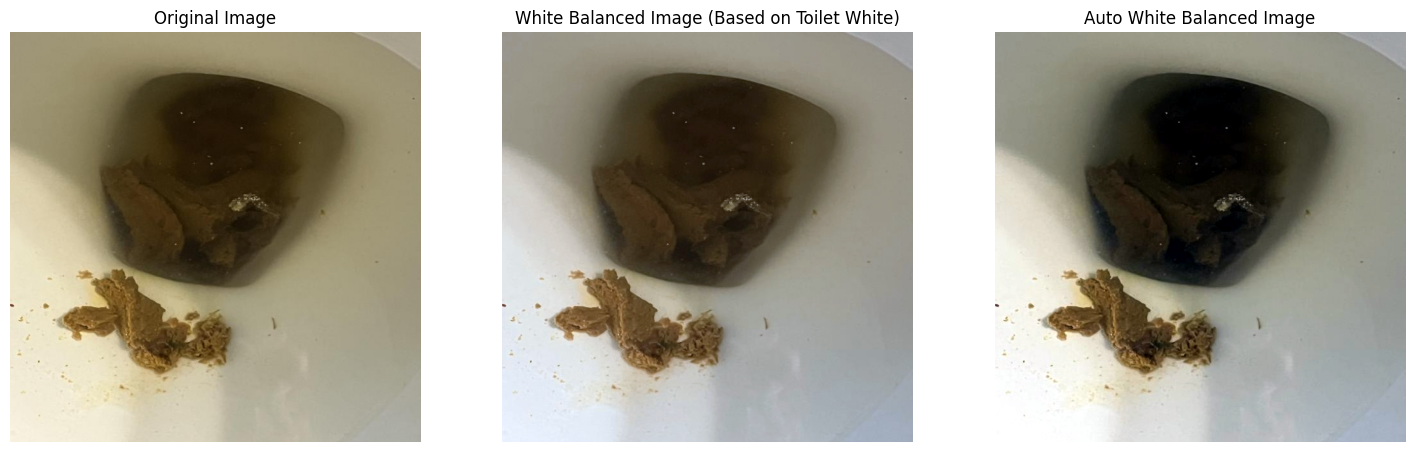

In [12]:
image_path = "/root/ai/dataset/bristol_type_300-599/482_jpeg.rf.1db808093a9c9780cf933ecd645218c1.jpg"
visualize_images(image_path)

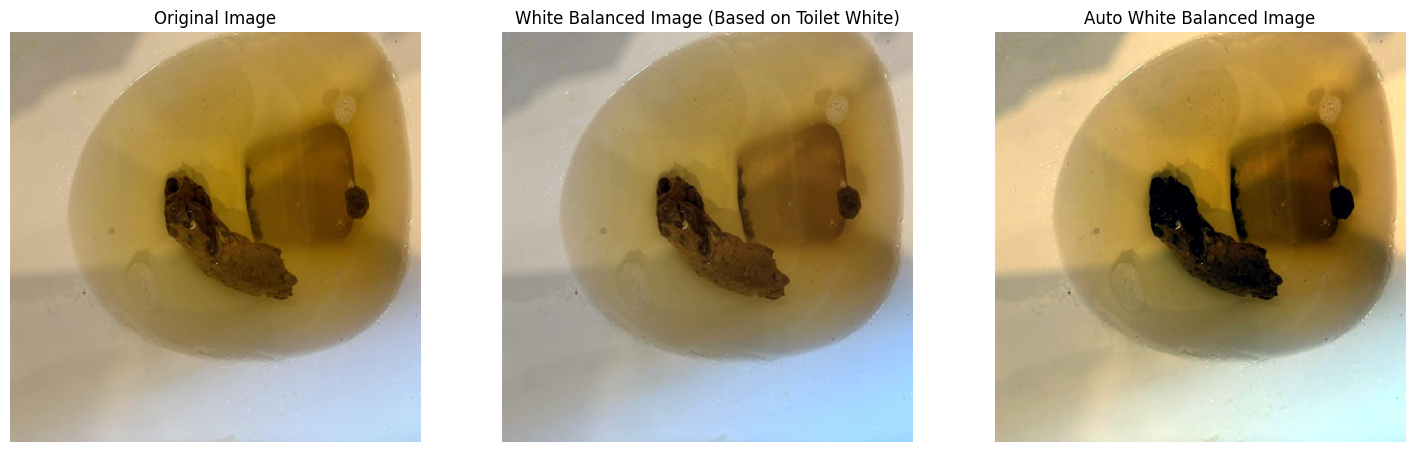

In [13]:
image_path = "/root/ai/dataset/bristol_type_300-599/554_jpeg.rf.fab0cf143a1574911e008bac5e0466a4.jpg"
visualize_images(image_path)